# Question 1: What is the role of filters and feature maps in Convolutional Neural Network (CNN)?

Answer:

In a Convolutional Neural Network (CNN), filters (also called kernels) and feature maps play a crucial role in extracting meaningful information from input images.

Filters are small learnable matrices that slide over the input image and perform a mathematical operation called convolution. Each filter is trained to detect specific local patterns such as edges, corners, textures, or shapes. During training, the values of these filters are automatically learned to best capture important visual features.

The result of applying a filter to the input image is known as a feature map. A feature map highlights the presence and spatial location of a particular feature detected by the filter. Bright or high-value regions in a feature map indicate where that feature strongly appears in the image.

Using multiple filters in a CNN allows the network to learn different types of features simultaneously. In early layers, filters detect simple features like edges, while in deeper layers, they capture more complex patterns such as object parts or full objects. This hierarchical feature learning makes CNNs highly effective for image recognition and classification tasks.

# Question 2: Explain the concepts of padding and stride in CNNs. How do they affect the output dimensions of feature maps?

Answer:

In Convolutional Neural Networks (CNNs), padding and stride are two important hyperparameters that control how the convolution operation is applied to the input image and how the output feature map is formed.

Padding

Padding refers to adding extra pixels (usually zeros) around the border of the input image before applying convolution. The main purpose of padding is to preserve the spatial dimensions of the input and to ensure that important information at the edges of the image is not lost. Without padding, the size of the feature map reduces after each convolution operation. Common padding types include valid padding (no padding) and same padding (output size remains the same as input size).

Stride

Stride defines the number of pixels by which the filter moves across the input image during convolution. A smaller stride (e.g., stride = 1) results in a larger output feature map with more detailed information, while a larger stride reduces the spatial dimensions of the feature map and lowers computational cost.

Effect on Output Dimensions

The output size of a feature map is determined by the following formula:

Output Size = (N−F+2P)/S + 1

where:

N = input size

F = filter (kernel) size

P = padding

S = stride

Thus, increasing padding increases the output size, while increasing stride reduces the output dimensions of the feature map.

# Question 3: Define receptive field in the context of CNNs. Why is it important for deep architectures?

Answer :            

The receptive field in a Convolutional Neural Network (CNN) refers to the specific region of the input image that influences the activation of a particular neuron in a feature map. In other words, it represents how much of the input image a neuron can “see” and use to make its decision.

In shallow layers of a CNN, the receptive field is small and focuses on local features such as edges or corners. As the network becomes deeper, the receptive field increases because neurons in higher layers combine information from multiple lower-layer feature maps. This allows deeper layers to capture larger, more complex patterns such as object parts or complete objects.

The concept of receptive field is important for deep architectures because recognizing high-level features requires a broader context of the image. A larger receptive field enables the network to understand spatial relationships and global structures, which is essential for tasks like object recognition, image classification, and scene understanding.

# Question 4: Discuss how filter size and stride influence the number of parameters in a CNN.

Answer :          

In a Convolutional Neural Network (CNN), filter size and stride influence the model’s complexity and computational cost, but they affect the number of parameters in different ways.

Filter Size

The size of a filter directly determines the number of learnable parameters in a convolutional layer. Larger filters contain more weights and therefore increase the parameter count. For example, a 5×5 filter has more parameters than a 3×3 filter, making the model more complex and computationally expensive. Using smaller filters is often preferred as they reduce parameters while still capturing important spatial features when stacked in deeper layers.

Stride

Stride controls how far the filter moves across the input image during convolution. Stride does not directly affect the number of parameters, since it does not change the size or number of filters. However, a larger stride reduces the spatial size of the output feature map, which decreases computational cost and affects how much spatial detail is retained.

Parameter Count Formula

The number of parameters for a single filter is given by:

Parameters per filter = (Fh​×Fw​×Cin​) + 1

where

Fh= filter height

Fw= filter width

Cin= number of input channels

+1 represents the bias term

Thus, larger filter sizes increase the number of parameters, while stride mainly affects output dimensions and efficiency rather than parameter coun

# Question 5: Compare LeNet, AlexNet, and VGG.

Answer:

LeNet-5, AlexNet, and VGG are important CNN architectures that represent different stages in the evolution of deep learning for image recognition.

LeNet-5 is one of the earliest convolutional neural networks and is relatively shallow, consisting of about seven layers. It uses small filters and simple activation functions and was primarily designed for handwritten digit recognition tasks such as the MNIST dataset. Due to its limited depth and capacity, LeNet-5 is suitable for simple image classification problems.

AlexNet is a deeper architecture with eight layers and marked a major breakthrough in deep learning by winning the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012. It introduced several key innovations such as the use of the ReLU activation function, dropout for regularization, and GPU-based training. AlexNet uses large filters in the initial layers, which help capture broader features but also increase computational cost.

VGG networks are very deep architectures with 16 to 19 layers. They use a consistent design strategy of stacking multiple 3×3 convolutional filters instead of larger filters. This approach increases depth while keeping the number of parameters manageable per layer. VGG models achieve high accuracy on large-scale image recognition tasks but are computationally expensive and require significant memory and processing power.

Overall, LeNet-5 is suitable for simple tasks, AlexNet represents a balance between depth and performance, and VGG emphasizes depth and accuracy at the cost of higher computation.

# Question 6: Using keras, build and train a simple CNN model on the MNIST dataset from scratch. Include code for module creation, compilation, training, and evaluation.

Answer :

#

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Preprocessing
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test = x_test.reshape(-1,28,28,1) / 255.

In [ ]:
# Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.9041 - loss: 0.3099 - val_accuracy: 0.9858 - val_loss: 0.0516
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 0.9868 - val_loss: 0.0444
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9895 - val_loss: 0.0454
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9875 - val_loss: 0.0399
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9903 - val_loss: 0.0432


In [ ]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9835 - loss: 0.0439


[0.03539590910077095, 0.9879999756813049]

# Question 7: Load and preprocess the CIFAR-10 dataset using Keras, and create a CNN model to classify RGB images. Show your preprocessing and architecture.

Answer :

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize pixel values (0–255  0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.


In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#Normalization ensures faster convergence.
#One-hot encoding converts labels into vectors

In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Convolutional Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Conv2D layers: Extract spatial features (edges, textures, shapes).
#MaxPooling2D: Downsamples feature maps to reduce computation and capture dominant features.
#Dropout: Prevents overfitting by randomly disabling neurons during training.
#Flatten + Dense: Converts 2D features into a fully connected classifier.
#Softmax output: Produces probability distribution across 10 classes.

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 327ms/step - accuracy: 0.3472 - loss: 1.7676 - val_accuracy: 0.6005 - val_loss: 1.1060
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 248s 318ms/step - accuracy: 0.6018 - loss: 1.1228 - val_accuracy: 0.6834 - val_loss: 0.9071
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 337ms/step - accuracy: 0.6698 - loss: 0.9346 - val_accuracy: 0.7133 - val_loss: 0.8136
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 332ms/step - accuracy: 0.7119 - loss: 0.8230 - val_accuracy: 0.7427 - val_loss: 0.7421
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 246s 314ms/step - accuracy: 0.7388 - loss: 0.7407 - val_accuracy: 0.7330 - val_loss: 0.7775
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 328ms/step - accuracy: 0.7557 - loss: 0.6880 - val_accuracy: 0.7638 - val_loss: 0.6727
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 321ms/step - accuracy: 0.7743 - loss: 0.6404 - val_accuracy: 0.7724 - val_loss: 0.6571
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 330ms/step - accuracy: 0.7907 -

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)


Test accuracy: 0.8012999892234802
Test loss: 0.6454728841781616


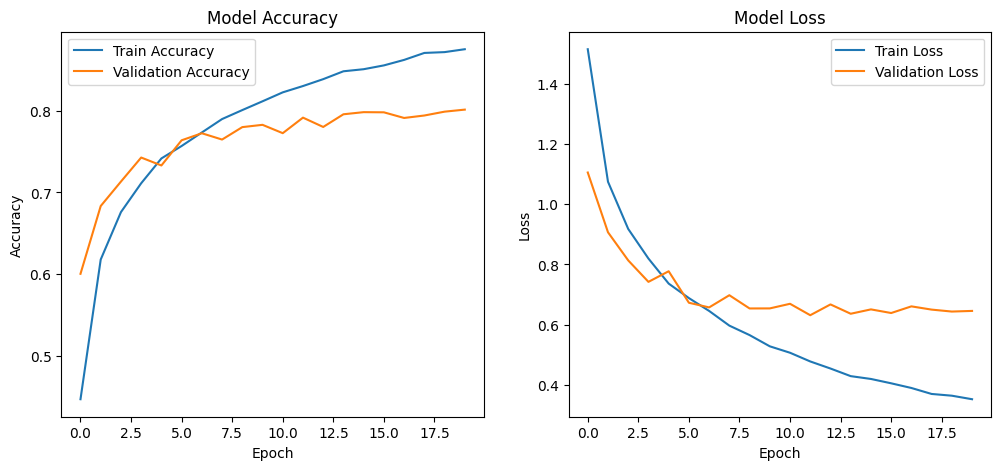

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Question 8: Using PyTorch, write a script to define and train a CNN on the MNIST dataset. Include model definition, data loaders, training loop, and accuracy evaluation.

Answer:

In [ ]:
#!pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Preprocessing & Data Loaders

from torchvision import datasets
from torch.utils.data import DataLoader

# Transform: convert to tensor & normalize (mean=0.1307, std=0.3081 for MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load training/test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 14.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.90MB/s]


In [ ]:
#CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)   # input: 1 channel, output: 32
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # input: 32 channels, output: 64
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # after pooling twice, image size = 7x7
        self.fc2 = nn.Linear(128, 10)          # 10 classes (digits 0–9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
#Training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')


In [ ]:
#Evaluation

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')


In [ ]:
epochs = 5
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


Train Epoch: 1 [0/60000] Loss: 2.288047
Train Epoch: 1 [6400/60000] Loss: 0.295562
Train Epoch: 1 [12800/60000] Loss: 0.050655
Train Epoch: 1 [19200/60000] Loss: 0.181115
Train Epoch: 1 [25600/60000] Loss: 0.056924
Train Epoch: 1 [32000/60000] Loss: 0.064106
Train Epoch: 1 [38400/60000] Loss: 0.060058
Train Epoch: 1 [44800/60000] Loss: 0.045067
Train Epoch: 1 [51200/60000] Loss: 0.049354
Train Epoch: 1 [57600/60000] Loss: 0.014471

Test set: Average loss: 0.0001, Accuracy: 9836/10000 (98.36%)

Train Epoch: 2 [0/60000] Loss: 0.054211
Train Epoch: 2 [6400/60000] Loss: 0.004287
Train Epoch: 2 [12800/60000] Loss: 0.017292
Train Epoch: 2 [19200/60000] Loss: 0.035978
Train Epoch: 2 [25600/60000] Loss: 0.003518
Train Epoch: 2 [32000/60000] Loss: 0.145293
Train Epoch: 2 [38400/60000] Loss: 0.007715
Train Epoch: 2 [44800/60000] Loss: 0.012858
Train Epoch: 2 [51200/60000] Loss: 0.029846
Train Epoch: 2 [57600/60000] Loss: 0.042800

Test set: Average loss: 0.0000, Accuracy: 9867/10000 (98.67%)

Tr

## Question 9: Given a custom image dataset stored in a local directory, write code using Keras ImageDataGenerator to preprocess and train a CNN model.

Answer :

In [ ]:
# Create Kaggle directory
!mkdir -p ~/.kaggle

# Copy kaggle.json from given path
!cp "/content/kaggle (1).json" ~/.kaggle/kaggle.json

# Set correct permission
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!pip install -q kagglehub


In [ ]:
import kagglehub


path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [ ]:
import os

for root, dirs, files in os.walk("/kaggle/input/cat-and-dog"):
    print(root)
    break


/kaggle/input/cat-and-dog


In [ ]:
dataset_path = "/kaggle/input/cat-and-dog"

train_dir = dataset_path + "/training_set/training_set"
test_dir  = dataset_path + "/test_set/test_set"


In [ ]:
print("Train folders:", os.listdir(train_dir))
print("Test folders :", os.listdir(test_dir))


Train folders: ['dogs', 'cats']
Test folders : ['dogs', 'cats']


In [ ]:
#ImageDataGenerator (Preprocessing + Augmentation)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
#CNN Model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
#compile

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 145s 700ms/step - accuracy: 0.4936 - loss: 0.7201 - val_accuracy: 0.5141 - val_loss: 0.6915
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 118s 590ms/step - accuracy: 0.5726 - loss: 0.6843 - val_accuracy: 0.6352 - val_loss: 0.6474
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 575ms/step - accuracy: 0.6182 - loss: 0.6621 - val_accuracy: 0.6708 - val_loss: 0.6217
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 107s 534ms/step - accuracy: 0.6612 - loss: 0.6232 - val_accuracy: 0.6790 - val_loss: 0.6032
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 102s 510ms/step - accuracy: 0.6820 - loss: 0.6003 - val_accuracy: 0.7152 - val_loss: 0.5499
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 104s 517ms/step - accuracy: 0.7051 - loss: 0.5643 - val_accuracy: 0.7114 - val_loss: 0.5419
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 101s 504ms/step - accuracy: 0.7036 - loss: 0.5690 - val_accuracy: 0.7377 - val_loss: 0.5361
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 102s 505ms/step - accuracy: 0.7195 -

In [ ]:
#evaluate

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.7519 - loss: 0.4960
Test Accuracy: 0.7671774625778198


In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

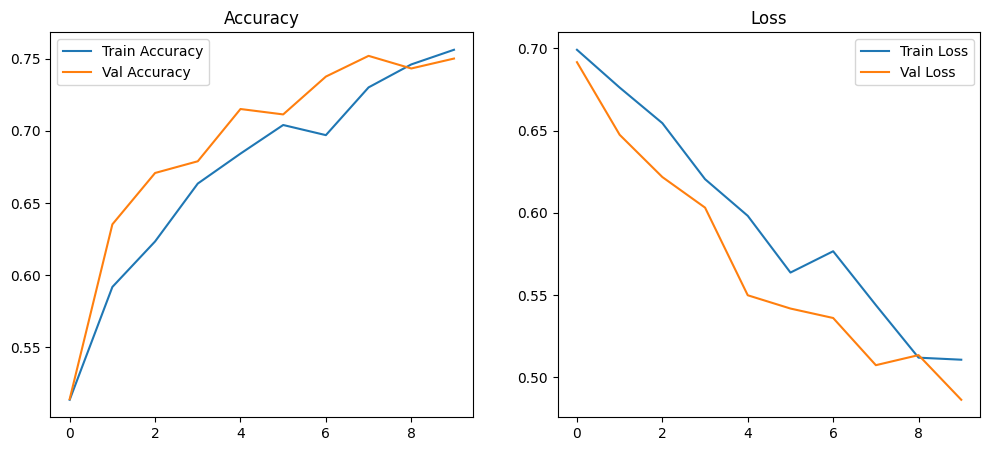

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
import os

test_cat = os.path.join(test_dir, "cats")
test_dog = os.path.join(test_dir, "dogs")

print(os.listdir(test_cat)[:5])
print(os.listdir(test_dog)[:5])


['cat.4414.jpg', 'cat.4420.jpg', 'cat.4880.jpg', 'cat.4326.jpg', 'cat.4620.jpg']
['dog.4329.jpg', 'dog.4223.jpg', 'dog.4253.jpg', 'dog.4190.jpg', 'dog.4354.jpg']


In [ ]:
#Load & preprocess the image

import numpy as np
from tensorflow.keras.preprocessing import image

img_path = test_dog + "/dog.4253.jpg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
#prediction

prediction = model.predict(img_array)
print("Raw prediction value:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Raw prediction value: [[0.8321936]]


In [ ]:
if prediction[0][0] > 0.5:
    print("Prediction: DOG")
else:
    print("Prediction: CAT")


Prediction: DOG


## Question 10: You are working on a web application for a medical imaging startup. Your task is to build and deploy a CNN model that classifies chest X-ray images into “Normal” and “Pneumonia” categories. Describe your end-to-end approach–from data preparation and model training to deploying the model as a web app using Streamlit.

Answer :

## 1. Data Collection and Understanding

Chest X-ray images are collected from a labeled medical imaging dataset containing two classes:

Normal

Pneumonia

Understanding the dataset distribution is important, as medical datasets often contain noise and class imbalance.

## 2. Data Preparation and Preprocessing

**Data Cleaning**

Remove corrupted or unreadable images.

Remove duplicate samples.

Verify correct labels to avoid training errors.

**Image Preprocessing**

Resize images to a fixed size (e.g., 224 × 224) to maintain uniform input dimensions.

Convert images to a consistent color format (RGB or grayscale).

Normalize pixel values to the range [0, 1] to stabilize training.

**Data Augmentation**

To improve generalization and reduce overfitting, the following techniques are applied:

Rotation

Zoom

Horizontal flipping

Shearing

**Data Splitting**

Training set: 70%

Validation set: 15%

Test set: 15%

## 3. CNN Model Architecture

**Feature Extraction Layers**

Convolutional layers extract spatial features such as edges, textures, and lung opacity patterns.

ReLU activation introduces non-linearity, allowing the model to learn complex patterns.

MaxPooling layers reduce spatial dimensions and computational cost while preserving important features.

**Regularization**

Dropout layers are added to prevent overfitting.

**Classification Layers**

Fully connected (Dense) layers learn high-level representations.

Final output layer consists of a single neuron with sigmoid activation for binary classification (Normal vs Pneumonia).

**Alternative Approach**

Transfer learning using pretrained models such as VGG16, ResNet50, or MobileNet can significantly improve performance, especially with limited medical data.

## 4. Model Training Strategy

The CNN model is compiled using Binary Cross-Entropy as the loss function and Adam as the optimizer.
Evaluation metrics include accuracy, precision, and recall.
The model is trained on the training dataset while validation data is used for hyperparameter tuning.
Early stopping is applied to prevent overfitting.
Class imbalance is handled using class weights to ensure fair learning between Normal and Pneumonia classes.

## 5. Model Evaluation

The trained model is evaluated on the unseen test dataset using accuracy, precision, recall, F1-score, and a confusion matrix.
In medical diagnosis applications, recall is prioritized to minimize false negatives and ensure pneumonia cases are not missed.

## 6. Model Saving

After successful training, the trained model is saved for deployment using:
model.save("pneumonia_cnn_model.h5")

## 7. Web Application Using Streamlit

A Streamlit web application is developed to allow users to upload chest X-ray images.
The application loads the trained CNN model, preprocesses the uploaded image, performs prediction, and displays the predicted class (Normal or Pneumonia) along with a confidence score.

## 8. Deployment

The application is deployed using platforms such as Streamlit Cloud, AWS, or Google Cloud Platform (GCP).
Required files include app.py, pneumonia_cnn_model.h5, and requirements.txt.
GitHub is used for version control and CI/CD integration.

## 9. Security and Compliance

Patient data is not stored.

Secure HTTPS communication is used.

A medical disclaimer is displayed indicating that the model is for assistance only and not a replacement for professional diagnosis.

## 10. Monitoring and Maintenance

After deployment, model performance is continuously monitored for accuracy and data drift.
The model is periodically retrained with new data to maintain reliability and performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#Data Preprocessing & Augmentation
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    "/content/chest_xray/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary"
)

val_data = val_test_datagen.flow_from_directory(
    "/content/chest_xray/val",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary"
)

test_data = val_test_datagen.flow_from_directory(
    "/content/chest_xray/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)


In [ ]:
#CNN Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
#Compile Model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


In [ ]:
#Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)


In [ ]:
#Evaluate Model

test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)


In [ ]:
model.save("pneumonia_cnn_model.h5")


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

model = load_model("pneumonia_cnn_model.h5")

st.title("Chest X-ray Pneumonia Detection")

uploaded_file = st.file_uploader("Upload Chest X-ray Image", type=["jpg","jpeg","png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    image = image.resize((224,224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)[0][0]

    if prediction > 0.5:
        st.error(f"Pneumonia Detected (Confidence: {prediction:.2f})")
    else:
        st.success(f"Normal (Confidence: {1 - prediction:.2f})")
